# Delhivery Case Study

By Gautam Naik (gautamnaik1994@gmail.com)  
Github Link: https://github.com/gautamnaik1994/Delhivery-Data-Engineering-Case-Study

**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


**Business Goal**


The Data team at Delhivery is dedicated to leveraging data to enhance the company's quality, efficiency, and profitability, ultimately outperforming its competitors. By understanding and processing data from data engineering pipelines, the team ensures that data is cleaned and prepared for analysis. Aggregating data based on segments and trips empowers data scientists and analysts to make informed business decisions and forecast business performance.

**Key Initiatives**

- Investigating the busiest routes to optimize logistics and delivery networks.
- Comparing route types by time consumption to identify inefficiencies and potential improvements.
- Identifying the top cities in terms of order volume and delivery frequency.
- Conducting exploratory data analysis (EDA) on different features to uncover patterns and trends.
- Performing hypothesis testing between different features to identify correlations and relationships.



**Dataset**

**Column Profiling:**

| Field                           | Description                                                                                                                                                                                                                  |
|---------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| data                            | Tells whether the data is testing or training data                                                                                                                                                                           |
| trip_creation_time              | Timestamp of trip creation                                                                                                                                                                                                   |
| route_schedule_uuid             | Unique Id for a particular route schedule                                                                                                                                                                                    |
| route_type                      | Transportation type                                                                                                                                                                                                         |
| route_type - FTL                | Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way                                                                                             |
| route_type - Carting            | Handling system consisting of small vehicles (carts)                                                                                                                                                                         |
| trip_uuid                       | Unique ID given to a particular trip (A trip may include different source and destination centers)                                                                                                                           |
| source_center                   | Source ID of trip origin                                                                                                                                                                                                     |
| source_name                     | Source Name of trip origin                                                                                                                                                                                                   |
| destination_cente               | Destination ID                                                                                                                                                                                                               |
| destination_name                | Destination Name                                                                                                                                                                                                            |
| od_start_time                   | Trip start time                                                                                                                                                                                                              |
| od_end_time                     | Trip end time                                                                                                                                                                                                                |
| start_scan_to_end_scan          | Time taken to deliver from source to destination                                                                                                                                                                             |
| is_cutoff                       | Unknown field                                                                                                                                                                                                                |
| cutoff_factor                   | Unknown field                                                                                                                                                                                                                |
| cutoff_timestamp                | Unknown field                                                                                                                                                                                                                |
| actual_distance_to_destination  | Distance in Kms between source and destination warehouse                                                                                                                                                                     |
| actual_time                     | Actual time taken to complete the delivery (Cumulative)                                                                                                                                                                      |
| osrm_time                       | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)                 |
| osrm_distance                   | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)                                                  |
| factor                          | Unknown field                                                                                                                                                                                                                |
| segment_actual_time             | This is a segment time. Time taken by the subset of the package delivery                                                                                                                                                     |
| segment_osrm_time               | This is the OSRM segment time. Time taken by the subset of the package delivery                                                                                                                                              |
| segment_osrm_distance           | This is the OSRM distance. Distance covered by subset of the package delivery                                                                                                                                                |
| segment_factor                  | Unknown field                                                                                                                                                                                                                

In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
import duckdb as db
pd.options.display.max_columns = None
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("./delhivery_data.csv")
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- We can see that there are missing values in the following columns: source_name and destination_name

# Feature Engineering

In [58]:
data = data.drop("data", axis=1)

In [59]:
data["trip_uuid"] = data["trip_uuid"].str.split("-").str[1]
data["route_schedule_uuid"] = data["route_schedule_uuid"].str.split(":").str[3]
data["trip_creation_time"] = pd.to_datetime(data["trip_creation_time"])
data["od_start_time"] = pd.to_datetime(data["od_start_time"])
data["od_end_time"] = pd.to_datetime(data["od_end_time"])
# df["cutoff_timestamp"]=pd.to_datetime(df["cutoff_timestamp"])

**Missing Values handling by merging the location data with the main data**

In [60]:
centers_df = db.sql("""
select distinct source_center as center, source_name as name from data where source_name is not null
union
select distinct destination_center as center, destination_name as name from data where destination_name is not null
""").to_df()

In [61]:
centers_df["state"] = centers_df["name"].str.split("(").str[1].replace("\(?\)?", "", regex=True)
centers_df["temp"] = centers_df["name"].str.split(" ").str[0]
centers_df["city"] = centers_df["temp"].str.split("_").str[0]
centers_df["place"] = centers_df["temp"].str.split("_").str[1]
centers_df["code"] = centers_df["temp"].str.split("_").str[-1]
centers_df = centers_df.drop(["temp", "name"], axis=1)

In [62]:
centers_df.sample(5)

,center,state,city,place,code
455,IND712602AAA,West Bengal,Arambag,BalibDPP,D
810,IND583121AAA,Karnataka,Siruguppa,Wrd12DPP,D
1206,IND464668AAA,Madhya Pradesh,Bareli,SourvDPP,D
1267,IND474003AAA,Madhya Pradesh,Gwalior,HrihrNgr,I
1089,IND388320AAA,Gujarat,Anand,Vaghasi,IP


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_schedule_uuid             144867 non-null  object        
 2   route_type                      144867 non-null  object        
 3   trip_uuid                       144867 non-null  object        
 4   source_center                   144867 non-null  object        
 5   source_name                     144574 non-null  object        
 6   destination_center              144867 non-null  object        
 7   destination_name                144606 non-null  object        
 8   od_start_time                   144867 non-null  datetime64[ns]
 9   od_end_time                     144867 non-null  datetime64[ns]
 10  start_scan_to_end_scan          144867 non-null  float64

In [64]:
data["segment_key"] = data["trip_uuid"] + "_" + data["source_center"] + "_" + data["destination_center"]

In [66]:
collapsed_inter_df = db.sql(""" 
select 
        segment_key
        , first(trip_uuid) as trip_uuid
        , first(source_center) as source_center
        , first(destination_center) as destination_center
        , first(trip_creation_time) as trip_creation_time
        , first(route_type) as route_type
        , first(od_start_time) as od_start_time
        , last(od_end_time) as od_end_time
        , first(start_scan_to_end_scan) as start_scan_to_end_scan
        , last(actual_distance_to_destination) as actual_distance_to_destination
        , last(actual_time) as actual_time_to_destination
        , last(osrm_time) as osrm_time
        , sum(segment_actual_time) as segment_actual_time
        , sum(segment_osrm_time) as segment_osrm_time
        , last(osrm_distance) as osrm_distance
        , sum(segment_osrm_distance) as segment_osrm_distance
from data group by segment_key
""").to_df()
collapsed_inter_df.head()

,segment_key,trip_uuid,source_center,destination_center,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance
0,153698045859626572_IND524101AAB_IND517501AAB,153698045859626572,IND524101AAB,IND517501AAB,2018-09-15 03:00:58.596515,FTL,2018-09-15 07:24:25.834574,2018-09-15 10:14:42.060695,170.0,76.029409,143.0,74.0,142.0,76.0,98.6939,93.2265
1,153833836174130977_IND673632AAA_IND673305AAA,153833836174130977,IND673632AAA,IND673305AAA,2018-09-30 20:12:41.741570,Carting,2018-09-30 20:12:41.741570,2018-10-01 01:04:41.744890,292.0,33.406799,44.0,38.0,43.0,37.0,36.9724,36.9725
2,153749921290385945_IND600056AAB_IND600044AAE,153749921290385945,IND600056AAB,IND600044AAE,2018-09-21 03:06:52.904238,Carting,2018-09-21 03:06:52.904238,2018-09-21 06:15:53.943104,189.0,25.000910,88.0,35.0,86.0,39.0,35.8459,37.6015
3,153838561974018796_IND473226AAA_IND473001AAA,153838561974018796,IND473226AAA,IND473001AAA,2018-10-01 09:20:19.740451,FTL,2018-10-01 09:20:19.740451,2018-10-01 11:15:57.418982,115.0,22.427948,44.0,37.0,44.0,36.0,30.0633,30.0632
4,153800528315390990_IND627811AAA_IND627401AAA,153800528315390990,IND627811AAA,IND627401AAA,2018-09-26 23:41:23.154160,FTL,2018-09-27 01:31:47.255547,2018-09-27 02:45:08.708179,73.0,31.798964,46.0,31.0,45.0,31.0,34.5860,34.5861


## Missing values handling

In [67]:
segment_df = db.sql(""" 
select collapsed_inter_df.*
       , scd.state as source_state
       , scd.city as source_city
       , dcd.state as destination_state
       , dcd.city as destination_city
    from collapsed_inter_df 
       join centers_df scd on collapsed_inter_df.source_center=scd.center
       join centers_df dcd on collapsed_inter_df.destination_center=dcd.center
 """).to_df()

In [68]:
segment_df = db.sql(""" 
select *, rank() over(partition by trip_uuid order by od_end_time ) rnk from segment_df 
""").to_df()

In [69]:
segment_df.head()

,segment_key,trip_uuid,source_center,destination_center,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,source_state,source_city,destination_state,destination_city,rnk
0,153671173668736946_IND110043AAA_IND110078AAA,153671173668736946,IND110043AAA,IND110078AAA,2018-09-12 00:22:16.687619,Carting,2018-09-12 00:22:16.687619,2018-09-12 01:29:19.277412,67.0,12.756768,44.0,21.0,43.0,25.0,18.7668,22.6548,Delhi,Delhi,Delhi,Janakpuri,1
1,153671277074687197_IND624001AAA_IND624619AAA,153671277074687197,IND624001AAA,IND624619AAA,2018-09-12 00:39:30.747127,FTL,2018-09-12 00:39:30.747127,2018-09-12 01:32:05.649177,52.0,26.534938,40.0,26.0,40.0,26.0,27.8573,27.8572,Tamil Nadu,Dindigul,Tamil Nadu,Oddnchtram,1
2,153671277074687197_IND624619AAA_IND624601AAA,153671277074687197,IND624619AAA,IND624601AAA,2018-09-12 00:39:30.747127,FTL,2018-09-12 01:32:05.649177,2018-09-12 02:52:44.647485,80.0,26.516747,39.0,27.0,39.0,26.0,28.2786,28.2786,Tamil Nadu,Oddnchtram,Tamil Nadu,Palani,2
3,153671277074687197_IND624601AAA_IND624101AAA,153671277074687197,IND624601AAA,IND624101AAA,2018-09-12 00:39:30.747127,FTL,2018-09-12 02:52:44.647485,2018-09-12 04:51:38.550800,118.0,23.527844,100.0,134.0,99.0,136.0,60.2645,61.6174,Tamil Nadu,Palani,Tamil Nadu,Kodaikanal,3
4,153671277074687197_IND624101AAA_IND624202AAA,153671277074687197,IND624101AAA,IND624202AAA,2018-09-12 00:39:30.747127,FTL,2018-09-12 04:51:38.550800,2018-09-12 06:45:07.329780,113.0,29.665603,87.0,119.0,86.0,118.0,55.1577,55.1577,Tamil Nadu,Kodaikanal,Tamil Nadu,Batlagundu,4


In [70]:
with open("segment_df.pkl", "wb") as f:
    pickle.dump(segment_df, f)

In [71]:
trip_df = db.sql("""
select 
    trip_uuid
    , first(source_center) as source_center
    , last(destination_center) as destination_center
    , count(*) as stops
    , first(trip_creation_time) as trip_creation_time
    , first(route_type) as route_type
    , first(od_start_time) as od_start_time
    , last(od_end_time) as od_end_time
    , sum(start_scan_to_end_scan) as start_scan_to_end_scan
    , sum(actual_distance_to_destination) as actual_distance_to_destination
    , sum(actual_time_to_destination) as actual_time_to_destination
    , sum(osrm_time) as osrm_time
    , sum(segment_actual_time) as segment_actual_time
    , sum(segment_osrm_time) as segment_osrm_time
    , sum(osrm_distance) as osrm_distance
    , sum(segment_osrm_distance) as segment_osrm_distance
    , first(source_state) as source_state
    , first(source_city) as source_city
    , first(destination_state) as destination_state
    , first(destination_city) as destination_city
from segment_df 
    group by trip_uuid

 """).to_df()
trip_df.head()

,trip_uuid,source_center,destination_center,stops,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,source_state,source_city,destination_state,destination_city
0,153671174968648046,IND781005AAA,IND781018AAB,1,2018-09-12 00:22:29.686740,Carting,2018-09-12 03:53:13.532367,2018-09-12 06:11:57.563883,138.0,9.941525,110.0,18.0,109.0,19.0,19.4925,21.4180,Assam,Guwahati,Assam,Guwahati
1,153671310683457427,IND700065AAA,IND712311AAA,1,2018-09-12 00:45:06.834828,Carting,2018-09-12 00:45:06.834828,2018-09-12 04:12:29.937384,207.0,15.738550,52.0,20.0,52.0,20.0,20.8831,20.8831,West Bengal,CCU,West Bengal,Kolkata
2,153671321710455800,IND421302AAG,IND000000ACB,1,2018-09-12 00:46:57.104787,FTL,2018-09-12 00:46:57.104787,2018-09-13 15:45:19.916768,2338.0,1078.198022,2090.0,968.0,2073.0,1003.0,1322.5269,1360.3053,Maharashtra,Bhiwandi,Haryana,Gurgaon
3,153671402673350359,IND574211AAA,IND562132AAA,3,2018-09-12 01:00:26.733769,FTL,2018-09-12 02:03:04.041511,2018-09-12 14:28:00.360402,674.0,258.100383,643.0,268.0,637.0,321.0,333.5973,399.2579,Karnataka,Bantwal,Karnataka,Puttur
4,153671723500134877,IND110037AAM,IND211002AAB,2,2018-09-12 01:53:55.001720,FTL,2018-09-12 01:53:55.001720,2018-09-13 03:46:17.503775,1551.0,563.532023,1025.0,473.0,1017.0,527.0,659.0495,724.8323,Delhi,Delhi,Uttar Pradesh,Kanpur


In [72]:
trip_df["trip_creation_hour"] = trip_df["trip_creation_time"].dt.hour
trip_df["trip_creation_day"] = trip_df["trip_creation_time"].dt.day
trip_df["trip_creation_month"] = trip_df["trip_creation_time"].dt.month
trip_df["trip_creation_weekday"] = trip_df["trip_creation_time"].dt.day_of_week

trip_df["od_start_time_month"] = trip_df["od_start_time"].dt.month
trip_df["od_end_time_month"] = trip_df["od_end_time"].dt.month
trip_df["od_end_time_day"] = trip_df["od_end_time"].dt.day
trip_df["od_start_time_day"] = trip_df["od_start_time"].dt.day
trip_df["od_start_time_hour"] = trip_df["od_start_time"].dt.hour
trip_df["od_end_time_hour"] = trip_df["od_end_time"].dt.hour
trip_df["od_start_time_minute"] = trip_df["od_start_time"].dt.minute
trip_df["od_end_time_minute"] = trip_df["od_end_time"].dt.minute
trip_df["od_diff_hours"] = (
    trip_df["od_end_time"]-trip_df["od_start_time"]).dt.total_seconds()/3600
trip_df = trip_df.drop(["od_start_time", "od_end_time","trip_creation_time"], axis=1)

In [73]:
with open("trip_df.pkl", "wb") as f:
    pickle.dump(trip_df, f)

In [3]:
with open("trip_df.pkl", "rb") as f:
    trip_df = pickle.load(f)

with open("segment_df.pkl", "rb") as f:
    segment_df = pickle.load(f)

In [96]:
trip_df.head()

,trip_uuid,source_center,destination_center,stops,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,source_state,source_city,destination_state,destination_city,trip_creation_hour,trip_creation_day,trip_creation_month,trip_creation_weekday,od_start_time_month,od_end_time_month,od_end_time_day,od_start_time_day,od_start_time_hour,od_end_time_hour,od_start_time_minute,od_end_time_minute,od_diff_hours
0,153671174968648046,IND781005AAA,IND781018AAB,1,Carting,138.0,9.941525,110.0,18.0,109.0,19.0,19.4925,21.4180,Assam,Guwahati,Assam,Guwahati,0,12,9,2,9,9,12,12,3,6,53,11,2.312231
1,153671310683457427,IND700065AAA,IND712311AAA,1,Carting,207.0,15.738550,52.0,20.0,52.0,20.0,20.8831,20.8831,West Bengal,CCU,West Bengal,Kolkata,0,12,9,2,9,9,12,12,0,4,45,12,3.456417
2,153671321710455800,IND421302AAG,IND000000ACB,1,FTL,2338.0,1078.198022,2090.0,968.0,2073.0,1003.0,1322.5269,1360.3053,Maharashtra,Bhiwandi,Haryana,Gurgaon,0,12,9,2,9,9,13,12,0,15,46,45,38.973003
3,153671402673350359,IND574211AAA,IND562132AAA,3,FTL,674.0,258.100383,643.0,268.0,637.0,321.0,333.5973,399.2579,Karnataka,Bantwal,Karnataka,Puttur,1,12,9,2,9,9,12,12,2,14,3,28,12.415644
4,153671723500134877,IND110037AAM,IND211002AAB,2,FTL,1551.0,563.532023,1025.0,473.0,1017.0,527.0,659.0495,724.8323,Delhi,Delhi,Uttar Pradesh,Kanpur,1,12,9,2,9,9,13,12,1,3,53,46,25.872917


# EDA

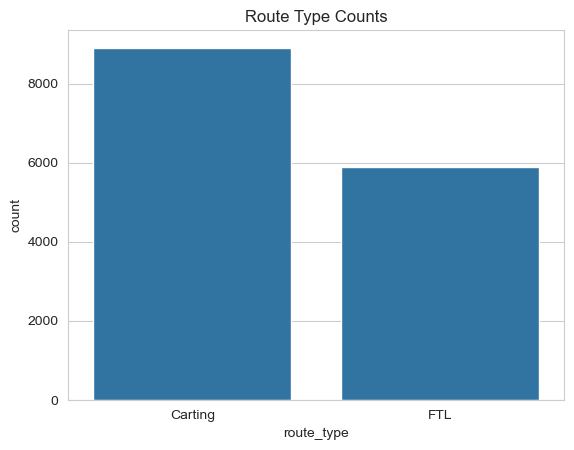

In [45]:
sns.countplot(data=trip_df, x="route_type")
plt.title("Route Type Counts");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- We can see that Carting is the most popular route type

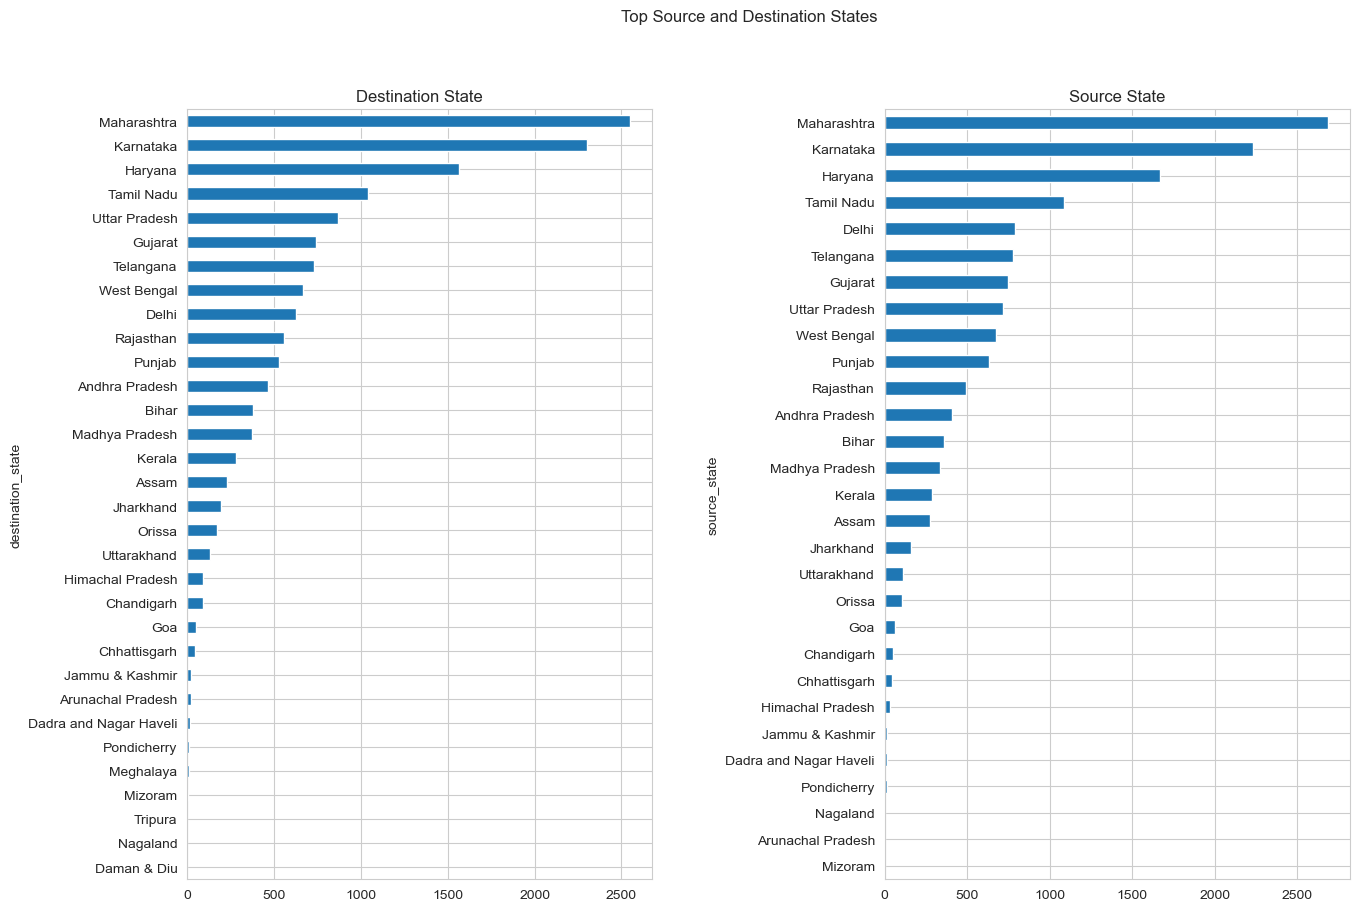

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

trip_df["destination_state"].value_counts().sort_values().plot(kind="barh", ax=ax[0])
trip_df["source_state"].value_counts().sort_values().plot(kind="barh", ax=ax[1])
plt.subplots_adjust(wspace=0.5)
# plt.subplots_adjust(top=-1.85)
ax[0].set_title("Destination State")
ax[1].set_title("Source State")
plt.suptitle("Top Source and Destination States");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see that most of the trips are from Maharashtra

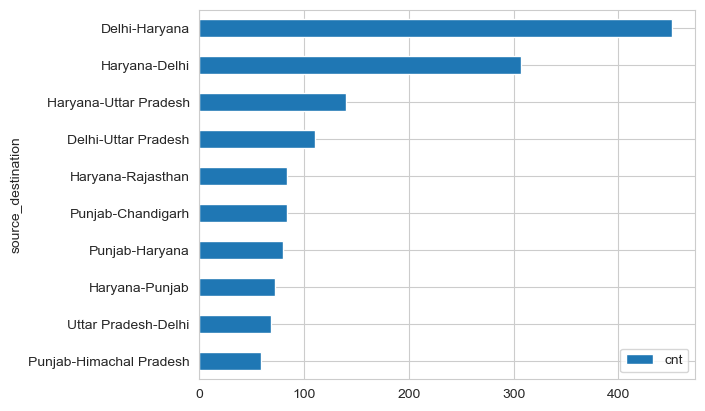

In [47]:
db.sql(""" 
select 
    concat(source_state,'-',destination_state) as source_destination
    , count(*) cnt 
    from trip_df 
       where source_state != destination_state 
       group by source_state, destination_state 
       order by cnt desc
""").to_df().head(10).sort_values(by="cnt").plot(kind="barh", x="source_destination", y="cnt");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see that most of trips have been made between Delhi and Haryana

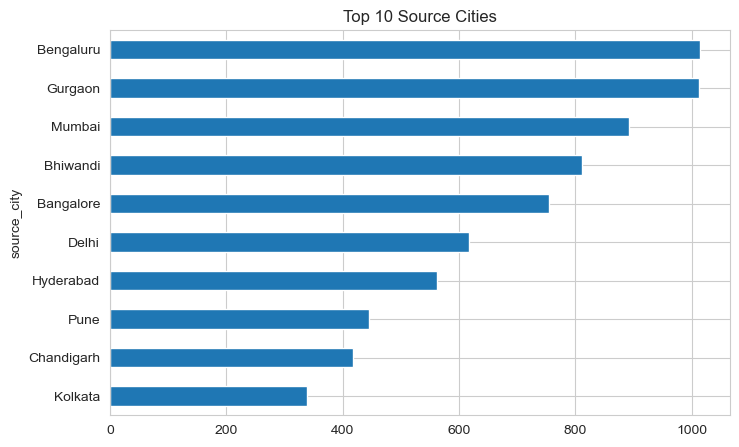

In [48]:
trip_df["source_city"].value_counts().sort_values()[-10:].plot(kind="barh", figsize=(8, 5))
plt.title("Top 10 Source Cities");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- Bengaluru is the most popular source city

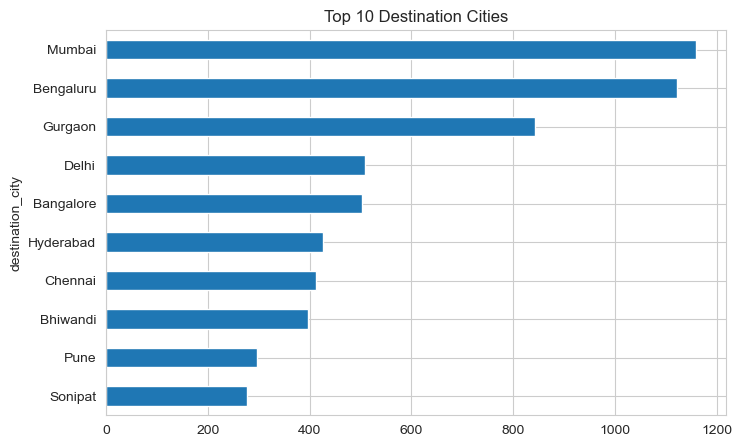

In [49]:
trip_df["destination_city"].value_counts().sort_values()[-10:].plot(kind="barh", figsize=(8, 5))
plt.title("Top 10 Destination Cities");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- Mumbai is the most popular destination city

<Axes: xlabel='trip_creation_hour', ylabel='count'>

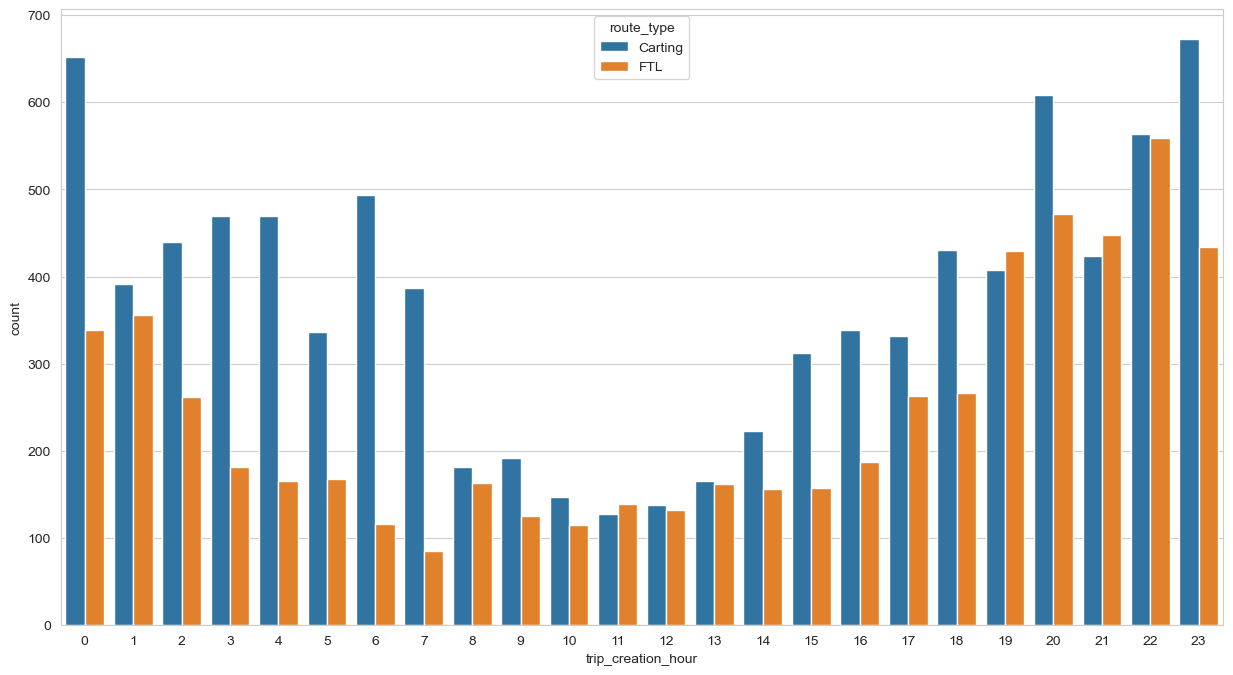

In [61]:
plt.figure(figsize=(15, 8))
sns.countplot(data=trip_df, x="trip_creation_hour", hue="route_type");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see that most of the FTL trips at night time whereas Carting trips are made throughout the day excluding morining hours

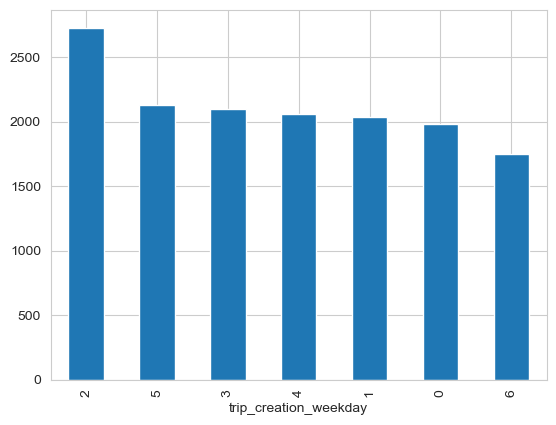

In [51]:
trip_df["trip_creation_weekday"].value_counts().plot(kind="bar");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- From above plot we can see that most of the trips are made on Tuesdays

In [53]:
route_based_cnt = db.sql(""" 
select 
    concat(source_state,'-',destination_state) as source_destination
    , route_type
    , count(*) cnt 
    from trip_df 
       where source_state != destination_state 
       group by source_state, destination_state , route_type 
       order by cnt desc
""").to_df().pivot(index="source_destination", columns="route_type", values="cnt")
route_based_cnt = route_based_cnt.reset_index()
route_based_cnt

route_type,source_destination,Carting,FTL
0,Andhra Pradesh-Karnataka,2.0,14.0
1,Andhra Pradesh-Orissa,4.0,2.0
2,Andhra Pradesh-Telangana,NaN,16.0
3,Arunachal Pradesh-Assam,4.0,NaN
4,Assam-Arunachal Pradesh,23.0,1.0
...,...,...,...
107,West Bengal-Assam,NaN,8.0
108,West Bengal-Bihar,NaN,1.0
109,West Bengal-Haryana,NaN,11.0
110,West Bengal-Jharkhand,NaN,20.0


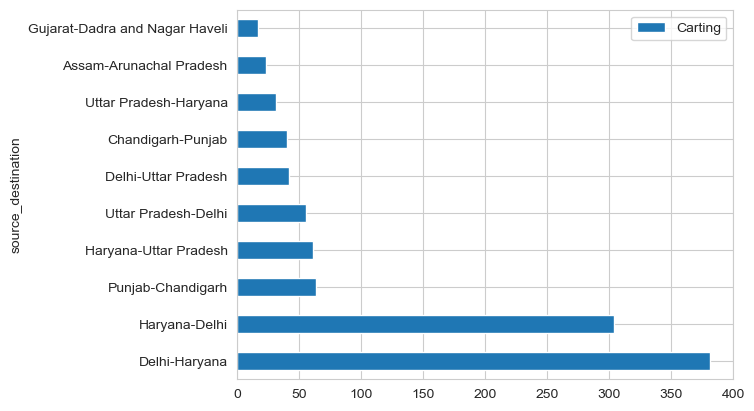

In [54]:
route_based_cnt[["source_destination", "Carting"]].sort_values(
by="Carting", ascending=False).head(10).plot(kind="barh", x="source_destination", y="Carting");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see that most of the trips have been made between Delhi and Haryana are of Carting route type

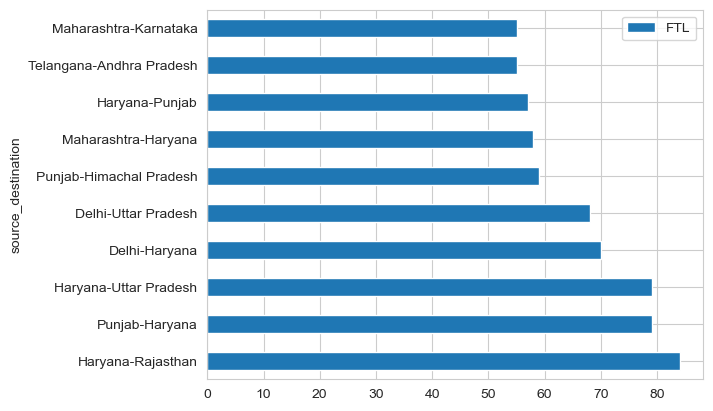

In [55]:
route_based_cnt[["source_destination", "FTL"]].sort_values(
    by="FTL", ascending=False).head(10).plot(kind="barh", x="source_destination", y="FTL");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see that most of the trips have been made between Haryana and Rajasthan are of FTL route type


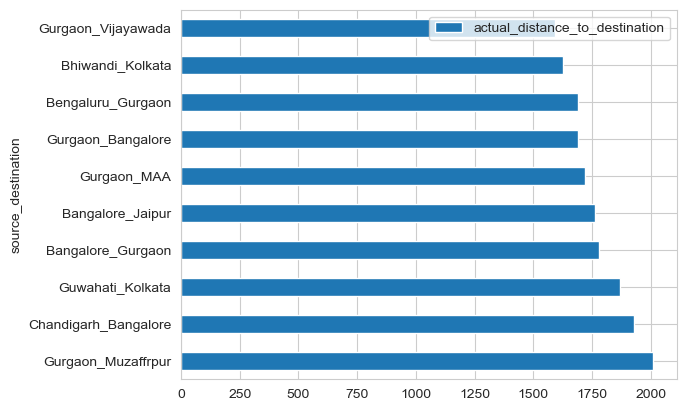

In [56]:
db.sql("""  
select 
       concat(source_city,'_', destination_city) source_destination
       , round(avg(actual_distance_to_destination),2) actual_distance_to_destination 
       from trip_df 
       group by source_city, destination_city 
       order by actual_distance_to_destination desc
       limit 10
""").to_df().plot(kind="barh", x="source_destination", y="actual_distance_to_destination");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- Above plot shows longest delivery distance between two cities

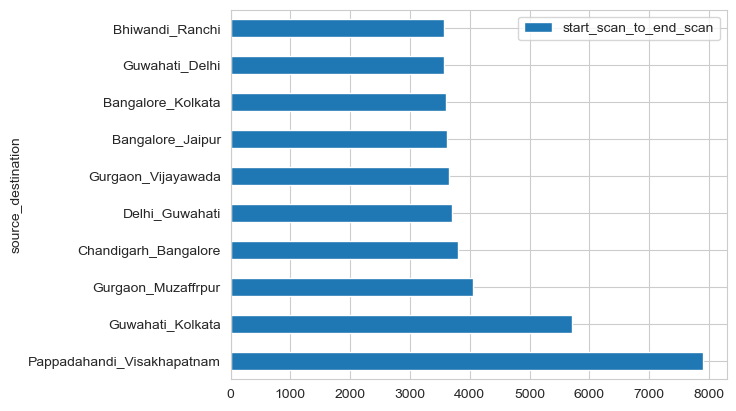

In [15]:
db.sql("""  
select 
       concat(source_city,'_', destination_city) source_destination
       , round(avg(start_scan_to_end_scan),2) start_scan_to_end_scan 
       from trip_df 
       group by source_city, destination_city 
       order by start_scan_to_end_scan desc
       limit 10
""").to_df().plot(kind="barh", x="source_destination", y="start_scan_to_end_scan");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- Above plot shows highest average time taken to reach destination from source

In [37]:
carting_ftl=db.sql(""" 
select 
       concat(source_city,'_', destination_city) source_destination
       , route_type
       , round(avg(actual_time_to_destination),2) actual_time_to_destination 
       from trip_df 
       group by source_city, destination_city , route_type
       order by source_destination
       
""").to_df().pivot(index="source_destination", columns="route_type", values="actual_time_to_destination").dropna()

In [39]:
carting_ftl["FTL-Carting_Diff"] = carting_ftl["FTL"] - carting_ftl["Carting"]
carting_ftl=carting_ftl.sort_values(by="FTL-Carting_Diff", ascending=False)
carting_ftl

route_type,Carting,FTL,Carting_Diff,FTL-Carting_Diff
source_destination,,,,
Delhi_Gurgaon,177.49,1644.20,1466.71,1466.71
Bengaluru_Bangalore,92.35,642.00,549.65,549.65
Ranchi_Phusro,295.00,826.00,531.00,531.00
Delhi_Noida,83.60,586.27,502.67,502.67
Bangalore_Bengaluru,78.44,478.95,400.51,400.51
Jalandhar_Chandigarh,292.40,674.00,381.60,381.60
Chandigarh_Chandigarh,118.09,302.62,184.53,184.53
Karkala_Dhrmsthala,95.00,180.00,85.00,85.00
Dehradun_Sonipat,464.00,530.00,66.00,66.00


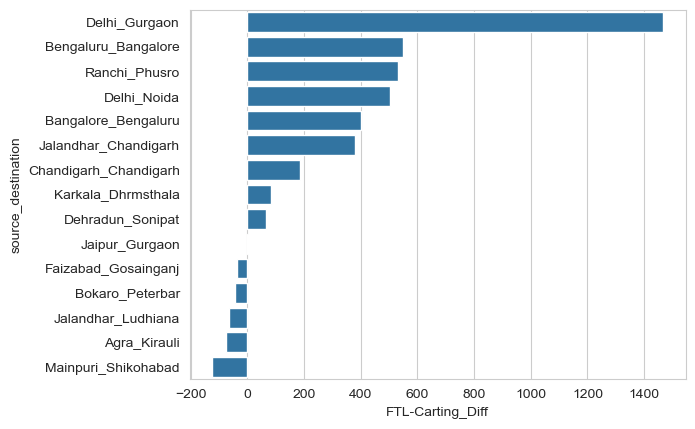

In [41]:
sns.barplot(data=carting_ftl, y="source_destination", x="FTL-Carting_Diff");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- From above plot we can see that average time taken to reach destination from source for some route pairs is more for FTL.

In [86]:
trip_df.head()

,trip_uuid,source_center,destination_center,stops,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,source_state,source_city,destination_state,destination_city,trip_creation_hour,trip_creation_day,trip_creation_month,trip_creation_weekday,od_start_time_month,od_end_time_month,od_end_time_day,od_start_time_day,od_start_time_hour,od_end_time_hour,od_start_time_minute,od_end_time_minute,od_diff_hours
0,153671174968648046,IND781005AAA,IND781018AAB,1,Carting,138.0,9.941525,110.0,18.0,109.0,19.0,19.4925,21.4180,Assam,Guwahati,Assam,Guwahati,0,12,9,2,9,9,12,12,3,6,53,11,2.312231
1,153671310683457427,IND700065AAA,IND712311AAA,1,Carting,207.0,15.738550,52.0,20.0,52.0,20.0,20.8831,20.8831,West Bengal,CCU,West Bengal,Kolkata,0,12,9,2,9,9,12,12,0,4,45,12,3.456417
2,153671321710455800,IND421302AAG,IND000000ACB,1,FTL,2338.0,1078.198022,2090.0,968.0,2073.0,1003.0,1322.5269,1360.3053,Maharashtra,Bhiwandi,Haryana,Gurgaon,0,12,9,2,9,9,13,12,0,15,46,45,38.973003
3,153671402673350359,IND574211AAA,IND562132AAA,3,FTL,674.0,258.100383,643.0,268.0,637.0,321.0,333.5973,399.2579,Karnataka,Bantwal,Karnataka,Puttur,1,12,9,2,9,9,12,12,2,14,3,28,12.415644
4,153671723500134877,IND110037AAM,IND211002AAB,2,FTL,1551.0,563.532023,1025.0,473.0,1017.0,527.0,659.0495,724.8323,Delhi,Delhi,Uttar Pradesh,Kanpur,1,12,9,2,9,9,13,12,1,3,53,46,25.872917


In [43]:
columns = ['start_scan_to_end_scan', 'actual_distance_to_destination',
           'actual_time_to_destination', 'segment_osrm_time', 'osrm_distance','segment_actual_time', 'osrm_time',
           'segment_osrm_distance', 'od_diff_hours']

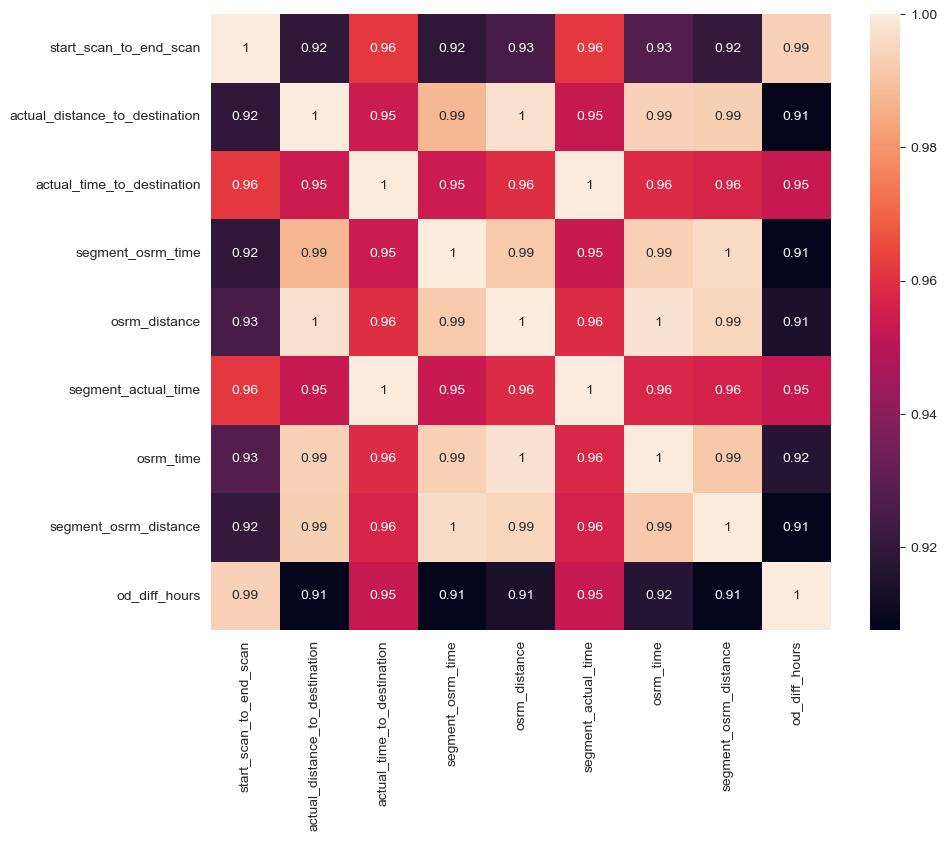

In [91]:
plt.figure(figsize=(10, 8))
sns.heatmap(trip_df[columns].corr(), annot=True);

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see the correlation between different features.
- We can use this plot to remove highly correlated features from the dataset

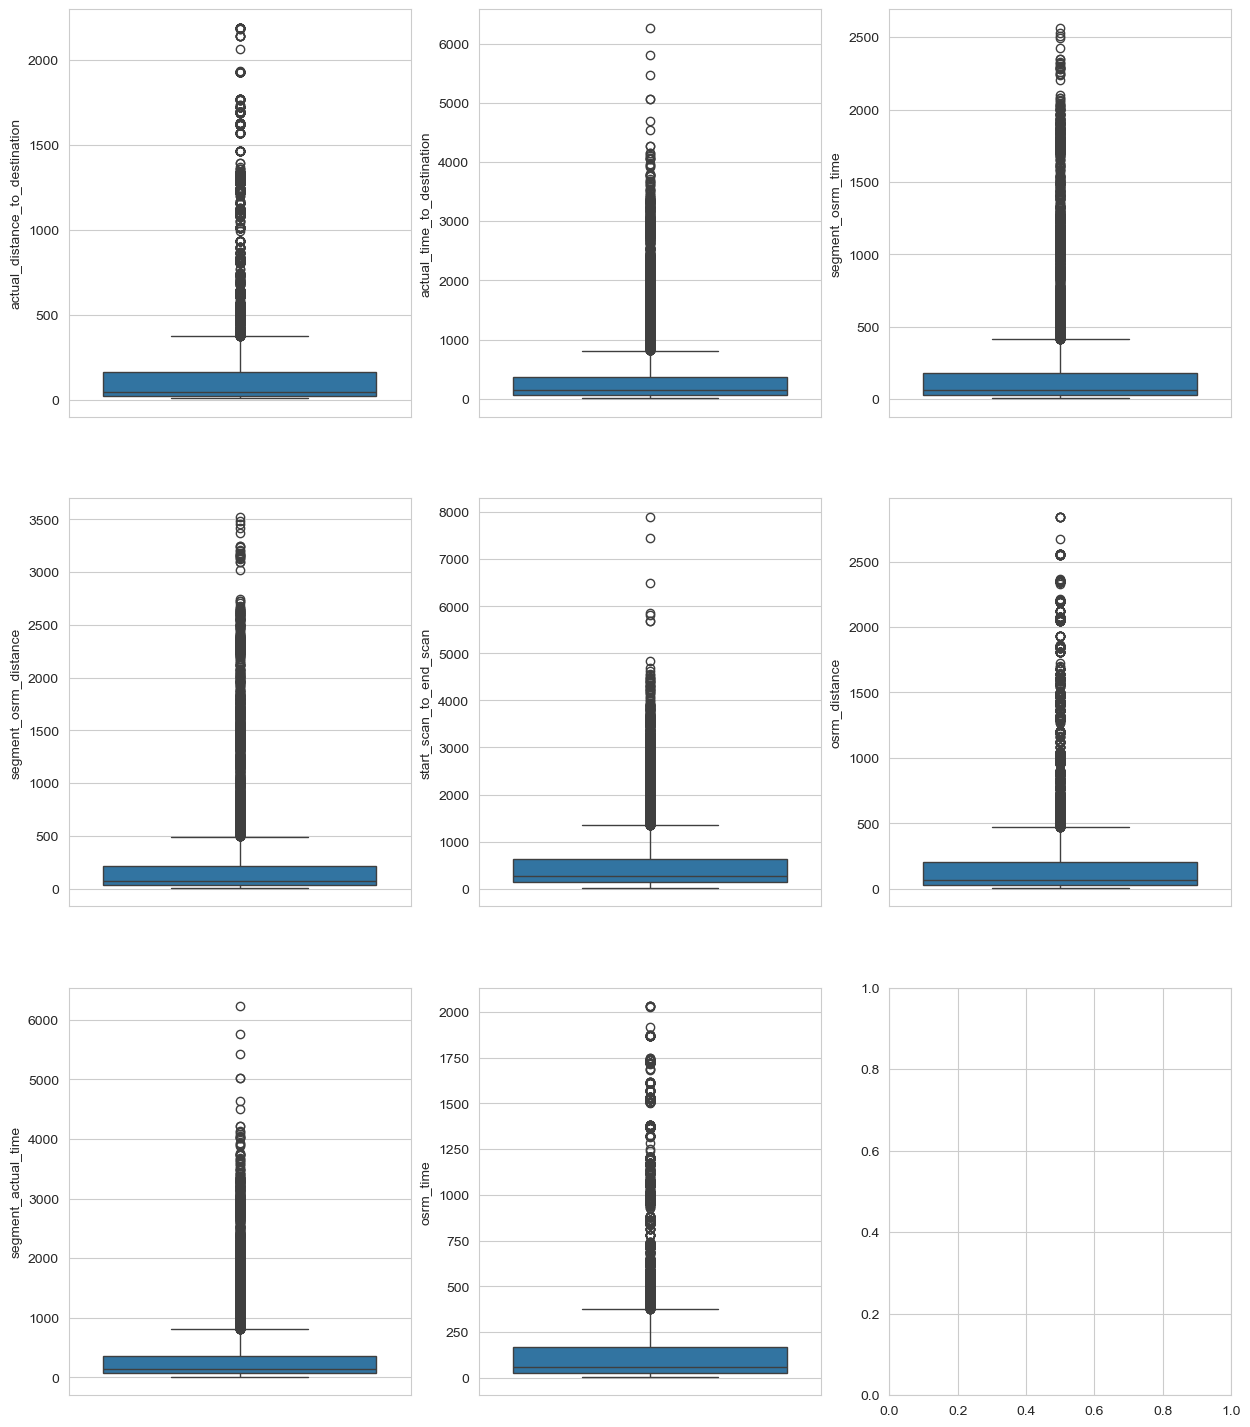

In [99]:
fig, ax = plt.subplots(3, 3, figsize=(15, 18))
sns.boxplot(data=trip_df, y="actual_distance_to_destination", ax=ax[0, 0])
sns.boxplot(data=trip_df, y="actual_time_to_destination", ax=ax[0, 1])
sns.boxplot(data=trip_df, y="segment_osrm_time", ax=ax[0, 2])
sns.boxplot(data=trip_df, y="segment_osrm_distance", ax=ax[1, 0])
sns.boxplot(data=trip_df, y="start_scan_to_end_scan", ax=ax[1, 1])
sns.boxplot(data=trip_df, y="osrm_distance", ax=ax[1, 2])
sns.boxplot(data=trip_df, y="segment_actual_time", ax=ax[2, 0]);
sns.boxplot(data=trip_df, y="osrm_time", ax=ax[2, 1]);


<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- Lot of outliers as per box plot. 

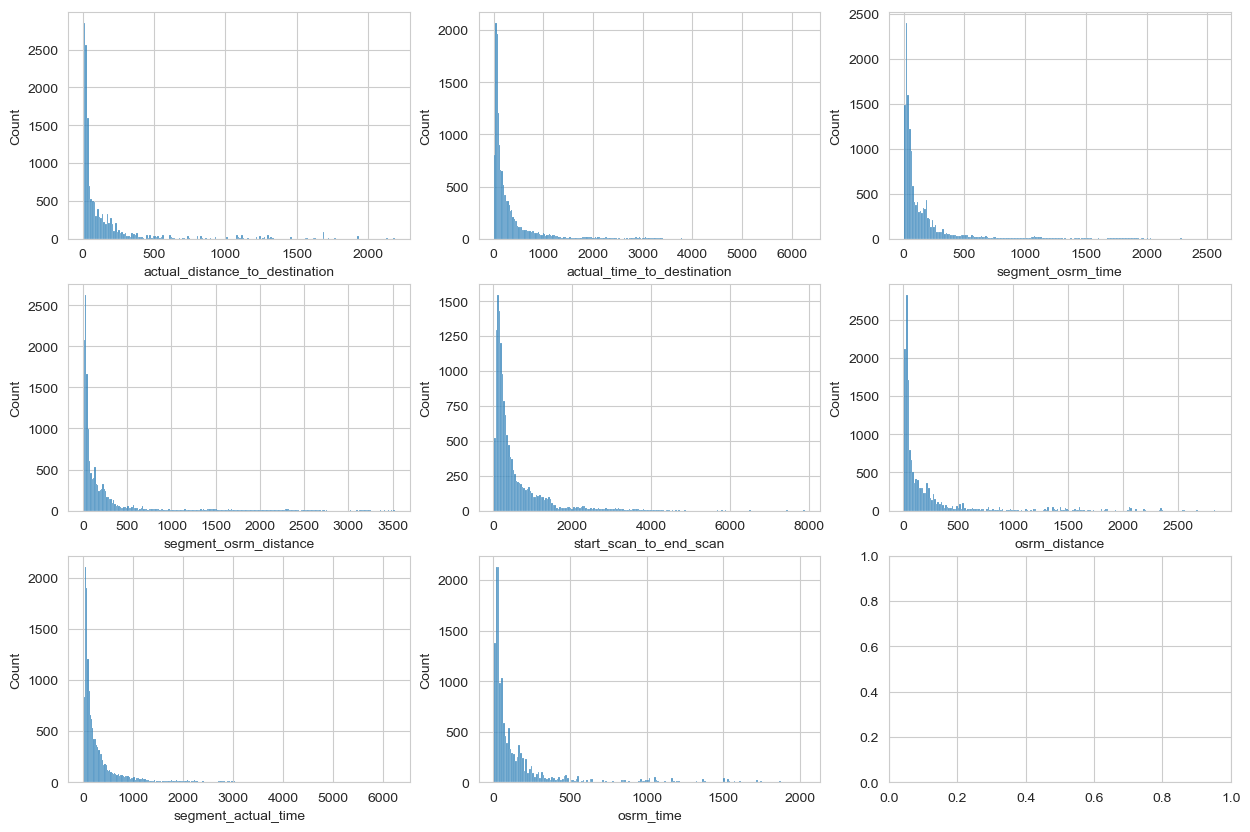

In [101]:
fig, ax = plt.subplots(3 , 3, figsize=(15, 10))
sns.histplot(data=trip_df, x="actual_distance_to_destination", ax=ax[0, 0])
sns.histplot(data=trip_df, x="actual_time_to_destination", ax=ax[0, 1])
sns.histplot(data=trip_df, x="segment_osrm_time", ax=ax[0, 2])
sns.histplot(data=trip_df, x="segment_osrm_distance", ax=ax[1, 0])
sns.histplot(data=trip_df, x="start_scan_to_end_scan", ax=ax[1, 1])
sns.histplot(data=trip_df, x="osrm_distance", ax=ax[1, 2])
sns.histplot(data=trip_df, x="segment_actual_time", ax=ax[2, 0]);
sns.histplot(data=trip_df, x="osrm_time", ax=ax[2, 1]);


<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- From above plots we can see that most of the features are not normally distributed.
- We need to apply log transformation to features to convert non normal data to normal distribution.

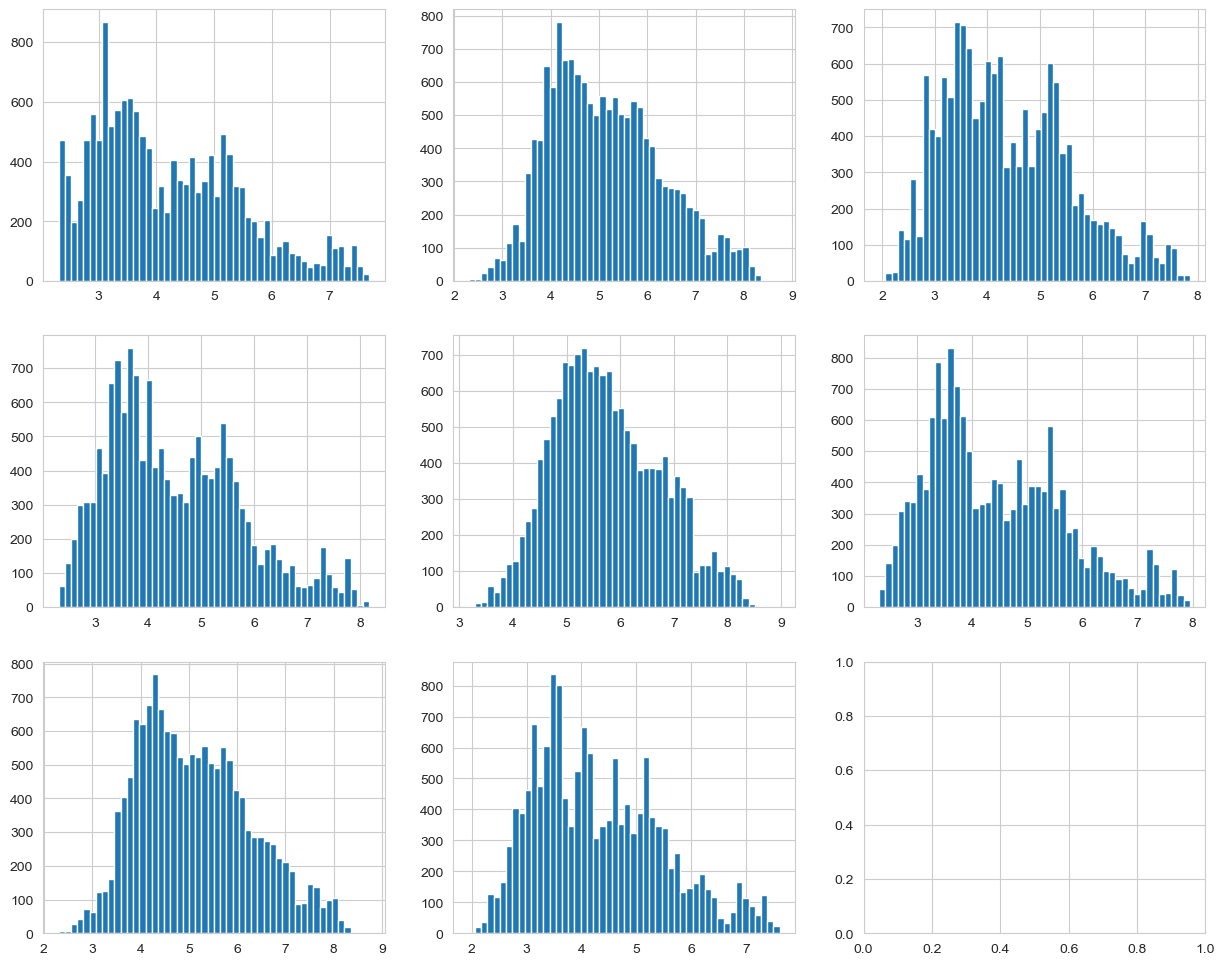

In [102]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))

np.log1p(trip_df["actual_distance_to_destination"]).hist(bins=50, ax=ax[0, 0])
np.log1p(trip_df["actual_time_to_destination"]).hist(bins=50, ax=ax[0, 1])
np.log1p(trip_df["segment_osrm_time"]).hist(bins=50, ax=ax[0, 2])
np.log1p(trip_df["segment_osrm_distance"]).hist(bins=50, ax=ax[1, 0])
np.log1p(trip_df["start_scan_to_end_scan"]).hist(bins=50, ax=ax[1, 1])
np.log1p(trip_df["osrm_distance"]).hist(bins=50, ax=ax[1, 2])
np.log1p(trip_df["segment_actual_time"]).hist(bins=50, ax=ax[2, 0]);
np.log1p(trip_df["osrm_time"]).hist(bins=50, ax=ax[2, 1]);


- From above plots we can see that most of the features are normally distributed after applying log transformation.

# Data Preprocessing 

In [104]:
processed_df = trip_df.copy()

**Applying log transformation to convert non normal data to normal distribution**

In [105]:
processed_df["actual_distance_to_destination"] = np.log1p(processed_df["actual_distance_to_destination"])
processed_df["actual_time_to_destination"] = np.log1p(processed_df["actual_time_to_destination"])
processed_df["segment_osrm_time"] = np.log1p(processed_df["segment_osrm_time"])
processed_df["segment_osrm_distance"] = np.log1p(processed_df["segment_osrm_distance"])
processed_df["start_scan_to_end_scan"] = np.log1p(processed_df["start_scan_to_end_scan"])
processed_df["osrm_distance"] = np.log1p(processed_df["osrm_distance"])
processed_df["segment_actual_time"] = np.log1p(processed_df["segment_actual_time"])
processed_df["osrm_time"] = np.log1p(processed_df["osrm_time"])

## Hypothesis testing

### **Actual time to destination vs osrm time**

H0 = "The actual time to destination equal to osrm time"  
H1 = "The actual time to destination is different from osrm time"

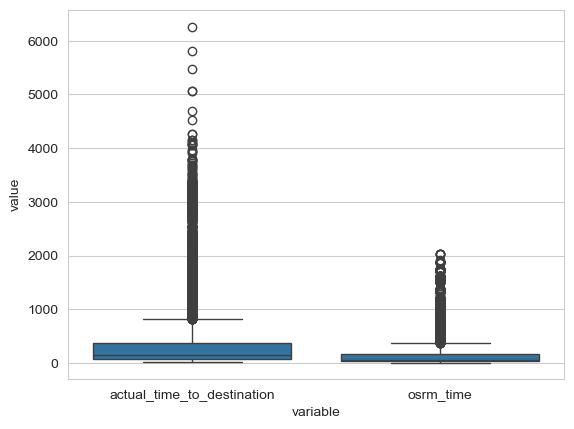

In [106]:
sns.boxplot(data=pd.melt(trip_df[["actual_time_to_destination","osrm_time"]]), x="variable", y="value");

In [111]:
ttest_ind(trip_df["actual_time_to_destination"],trip_df["osrm_time"])

TtestResult(statistic=38.08071567723596, pvalue=8.2146191343466e-310, df=29572.0)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>
- Since p-value is less than 0.05, we reject the null hypothesis. ie the actual_time_to_destination is different from osrm_time

### **Actual time to destination vs segment actual time**

H0 = "The Actual time to destination equal to segment actual time"  
H1 = "The Actual time to destination is different from segment actual time"

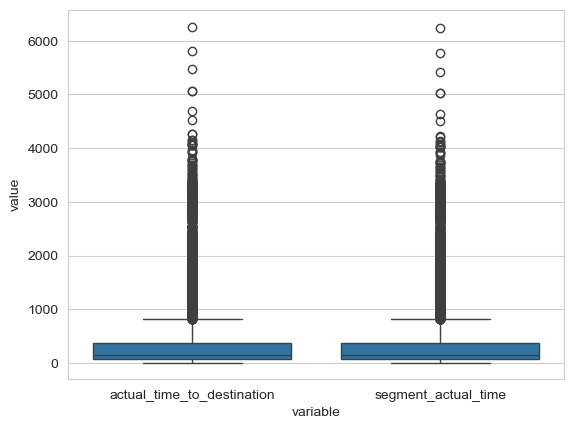

In [ ]:
sns.boxplot(data=pd.melt(trip_df[["actual_time_to_destination","segment_actual_time"]]), x="variable", y="value");

In [112]:
ttest_ind(trip_df["actual_time_to_destination"], trip_df["segment_actual_time"])

TtestResult(statistic=0.499475764573994, pvalue=0.6174479719707524, df=29572.0)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>
- Since p-value is grater than 0.05, we accept the null hypothesis. ie the The Actual time to destination equal to segment actual time.

### **Osrm distance vs segment osrm distance**

H0 = "The osrm distance equal to segment osrm distance"  
H1 = "The osrm distance is different from segment osrm distance"

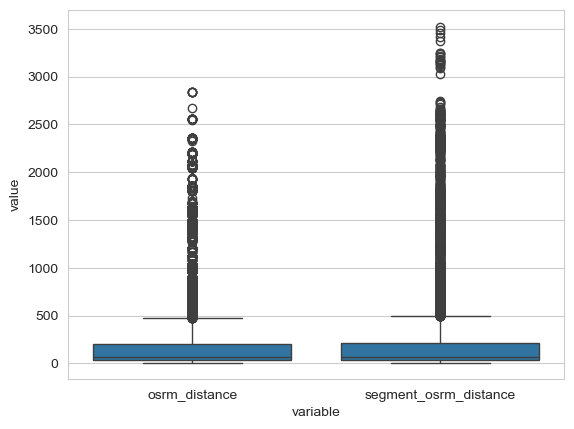

In [109]:
sns.boxplot(data=pd.melt(trip_df[["osrm_distance","segment_osrm_distance"]]), x="variable", y="value");

In [114]:
ttest_ind(trip_df["osrm_distance"], trip_df["segment_osrm_distance"])

TtestResult(statistic=-4.102786976805525, pvalue=4.09295781912011e-05, df=29572.0)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>
- Since p-value is less than 0.05, we reject the null hypothesis. ie The osrm distance is different from segment osrm distance

### **Osrm time vs segment osrm time**

H0 = "The osrm time equal to segment osrm time"  
H1 = "The osrm time is different from segment osrm time"

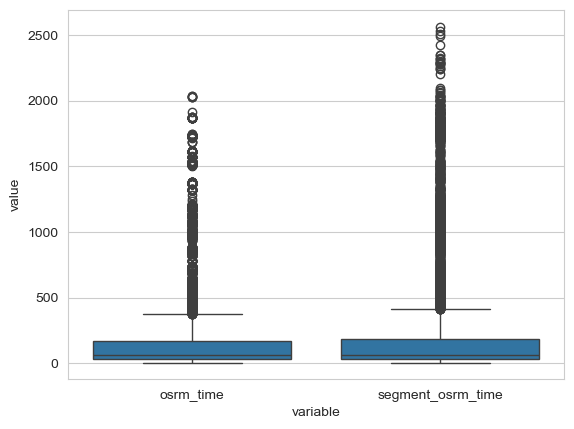

In [110]:
sns.boxplot(data=pd.melt(trip_df[["osrm_time","segment_osrm_time"]]), x="variable", y="value");

In [115]:
ttest_ind(trip_df["osrm_time"], trip_df["segment_osrm_time"])

TtestResult(statistic=-5.711782161676085, pvalue=1.128703468644937e-08, df=29572.0)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>  
- Since p-value is less than 0.05, we reject the null hypothesis.ie The osrm time is different from segment osrm time

## Categorical Feature Encoding

In [121]:
processed_df["route_type"] = processed_df["route_type"].apply(
    lambda x: 1 if x == "FTL" else 0)

In [122]:
label_encoder_source_destination = LabelEncoder()
unique_source_destination_list = list(set([*processed_df["source_center"].unique(), *processed_df["destination_center"].unique()]))
label_encoder_source_destination.fit(unique_source_destination_list)
processed_df["source_center"] = label_encoder_source_destination.transform(processed_df["source_center"])
processed_df["destination_center"] = label_encoder_source_destination.transform(processed_df["destination_center"])

In [123]:
labe_encoder_state = LabelEncoder()
unique_state_list = list(set([*processed_df["source_state"].unique(), *processed_df["destination_state"].unique()]))
labe_encoder_state.fit(unique_state_list)
processed_df["source_state"] = labe_encoder_state.transform(processed_df["source_state"])
processed_df["destination_state"] = labe_encoder_state.transform(processed_df["destination_state"])

In [124]:
labe_encoder_city = LabelEncoder()
unique_city_list = list(set([*processed_df["source_city"].unique(), *processed_df["destination_city"].unique()]))
labe_encoder_city.fit(unique_city_list)
processed_df["source_city"] = labe_encoder_city.transform(processed_df["source_city"])
processed_df["destination_city"] = labe_encoder_city.transform(processed_df["destination_city"])

In [125]:
with open("processed_df.pkl", "wb") as f:
    pickle.dump(processed_df, f)

## Numerical Feature Scaling

In [116]:
standard_scaling_columns = ["start_scan_to_end_scan", "actual_distance_to_destination",
                            "actual_time_to_destination", "segment_osrm_time", "segment_osrm_distance", "od_diff_hours", "osrm_distance", 
                            "segment_actual_time", "osrm_time"]

In [117]:
sc = StandardScaler()
processed_df[standard_scaling_columns] = sc.fit_transform(
    processed_df[standard_scaling_columns])

In [118]:
min_max_scaling_columns = ["trip_creation_hour", "trip_creation_day", "trip_creation_month", "trip_creation_weekday", "od_start_time_month",
                           "od_end_time_month", "od_end_time_day", "od_start_time_day", "od_start_time_hour", "od_end_time_hour", 
                           "od_start_time_minute", "od_end_time_minute"]

In [119]:
min_max_sc = MinMaxScaler()
processed_df[min_max_scaling_columns] = min_max_sc.fit_transform(
    processed_df[min_max_scaling_columns])

In [126]:
processed_df.sample(5)

,trip_uuid,source_center,destination_center,stops,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,source_state,source_city,destination_state,destination_city,trip_creation_hour,trip_creation_day,trip_creation_month,trip_creation_weekday,od_start_time_month,od_end_time_month,od_end_time_day,od_start_time_day,od_start_time_hour,od_end_time_hour,od_start_time_minute,od_end_time_minute,od_diff_hours
2999,153729863029649858,552,598,1,1,1.256140,1.526449,1.416606,1.431403,1.416163,1.334095,1.512463,1.469283,18,156,18,12,0.826087,0.586207,0.0,0.166667,0.0,0.0,0.620690,0.586207,0.826087,0.565217,0.389831,0.677966,0.823348
10138,153682425683336487,33,7,1,0,-0.176805,-0.232870,0.077484,-0.157303,0.077061,-0.231667,-0.194561,-0.246023,8,268,11,373,0.304348,0.413793,0.0,0.500000,0.0,0.0,0.413793,0.413793,0.304348,0.521739,0.627119,0.000000,-0.424251
11113,153697923296988490,422,431,3,1,0.699675,1.068885,0.973853,1.234510,0.970278,1.179578,1.010171,0.996807,10,330,10,384,0.086957,0.482759,0.0,0.833333,0.0,0.0,0.482759,0.482759,0.086957,0.565217,0.677966,0.169492,0.125484
735,153821467414628127,518,518,3,0,0.004215,-0.318035,0.054157,-0.260086,0.053504,-0.140856,-0.216098,-0.284073,18,819,18,837,0.391304,0.965517,0.0,0.833333,0.0,0.0,0.965517,0.965517,0.391304,0.652174,0.864407,0.118644,-0.344081
13342,153766486594351691,29,201,2,1,1.540887,1.712381,1.484161,1.587825,1.479736,1.643755,1.661834,1.729361,8,269,29,497,0.043478,0.758621,0.0,1.000000,0.0,0.0,0.793103,0.758621,0.043478,0.043478,0.118644,0.423729,1.363844


# Recommendations and Business Insights

- Carting route type is the most popular route type. This can be further improved by increasing the delivery hubs in different states.
- Delhi-Haryana is the busiest state pair.

- Increasing the delivery capacity on all Delhi-Haryana routes will be beneficial.

- Delhi-Gurugram route needs to have more Carting type route as having FTL increases the time by a huge ammount.

- Most of the trips are made on Tuesdays

- Most of the FTL trips are at night time whereas Carting trips are made throughout the day excluding morning hours

- Bengaluru and Mumbai are the most popular source and destination cities.

- The OSRM system should be tweaked to improve the accuracy as it overestimates the distance between two points but underestimates the time taken to travel between two points.

- Pappadahandi-Visakhapatnam is the highest time taking trip whereas Gurgaon-Muzaffrpur is the longest distance trip.